<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialisation" data-toc-modified-id="Initialisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialisation</a></span></li><li><span><a href="#Data-inspection" data-toc-modified-id="Data-inspection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data inspection</a></span></li><li><span><a href="#Correction-of-sample-drifts" data-toc-modified-id="Correction-of-sample-drifts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correction of sample drifts</a></span></li><li><span><a href="#Transformation-from-angular-to-reciprocal-space" data-toc-modified-id="Transformation-from-angular-to-reciprocal-space-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transformation from angular to reciprocal space</a></span></li><li><span><a href="#Determination-of-a-VOI-in-reciprocal-space" data-toc-modified-id="Determination-of-a-VOI-in-reciprocal-space-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Determination of a VOI in reciprocal space</a></span></li><li><span><a href="#Calculation-and-visualisation-of-local-structural-parameters" data-toc-modified-id="Calculation-and-visualisation-of-local-structural-parameters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculation and visualisation of local structural parameters</a></span><ul class="toc-item"><li><span><a href="#COMs" data-toc-modified-id="COMs-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>COMs</a></span></li><li><span><a href="#Gaussian-fitting-(via-XSOCS)" data-toc-modified-id="Gaussian-fitting-(via-XSOCS)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Gaussian fitting (via XSOCS)</a></span></li></ul></li><li><span><a href="#Export-data" data-toc-modified-id="Export-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Export data</a></span></li></ul></div>

# Initialisation 

In [1]:
# %%html

# <style>
#     .container {width:98%}
# <\sytle>

In [2]:
%matplotlib widget

import sxdm
import id01lib
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
import hdf5plugin
import ipywidgets as ipw
import scipy.ndimage as ndi
import xrayutilities as xu

from h5glance import H5Glance as h5p
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['font.family'] = 'Liberation Sans'
mpl.rcParams['figure.dpi'] = 100

path_exp = '/data/visitor/ma5580/id01/20230425/'

# Data inspection

In [3]:
name_sample = "PbTe_SAG"
name_dset = "SXDM_0024"

path_dset_24 = f"{path_exp}/RAW_DATA/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

viz = sxdm.widgets.bliss.InspectROI(path_dset_24, default_roi='mpx1x4_int')
# viz.show()

In [4]:
name_sample = "PbTe_SAG"
name_dset = "SXDM_0025"

path_dset_25 = f"{path_exp}/RAW_DATA/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

viz = sxdm.widgets.bliss.InspectROI(path_dset_25, default_roi='mpx1x4_int')
# viz.show()

# Correction of sample drifts 

In [5]:
scan_nos_24 = [f'{n}.1' for n in range(1,13)]
sxdm_raw_24 = [sxdm.io.bliss.get_roidata(path_dset_24, s, 'mpx1x4_int') for s in scan_nos_24]

scan_nos_25 = [f'{n}.1' for n in range(1,19)]
sxdm_raw_25 = [sxdm.io.bliss.get_roidata(path_dset_25, s, 'mpx1x4_int') for s in scan_nos_25]

sxdm_raw = sxdm_raw_24 + sxdm_raw_25

In [6]:
shifts = sxdm.utils.general._get_shift(sxdm_raw, upsample_factor=5)
sxdm_shift = [ndi.shift(m, s, cval=np.nan) for m, s in zip(sxdm_raw, shifts)]

In [7]:
# import gif

# @gif.frame
# def plotit(i):
#     fig, ax = plt.subplots(1,1, layout='tight', figsize=(3,3))
#     im = ax.imshow(sxdm_shift[i])

# frames = [plotit(s) for s in range(len(sxdm_raw))]
# gif.save(frames, 'shift_135_SAG.gif', duration=5, unit='seconds', between='startend')

In [8]:
path_out = f'{path_exp}/PROCESSED_DATA/{name_sample}_{name_dset}/'

In [9]:
name_xsocs_files = '135_combined'

In [10]:
sxdm.utils.bliss.make_xsocs_links_stitch(
    [path_dset_24, path_dset_25], [scan_nos_24, scan_nos_25], path_out, name_xsocs_files
)

> Selecting scans 1.1 --> 12.1 in PbTe_SAG_SXDM_0024
> Selecting detector mpx1x4
> Linking # 12.1/12.1 
> Done!

> Selecting scans 1.1 --> 18.1 in PbTe_SAG_SXDM_0025
> Selecting detector mpx1x4
> Linking # 18.1/18.1 
> Done!



In [11]:
path_master = f'{path_out}/{name_xsocs_files}_master.h5'

In [12]:
%%time

sxdm.process.xsocs.shift_xsocs_data(path_master, path_out, shifts)

Using subh5_list=None, shifting file pattern /data/visitor/ma5580/id01/20230425//PROCESSED_DATA/PbTe_SAG_SXDM_0025//135_combined*.1.h5 !


NOT overwriting #18.1!

NOT overwriting #11.1!

NOT overwriting #1.1!

NOT overwriting #12.1!

NOT overwriting #27.1!
NOT overwriting #20.1!


NOT overwriting #15.1!

NOT overwriting #13.1!
NOT overwriting #21.1!
NOT overwriting #2.1!
NOT overwriting #25.1!



NOT overwriting #17.1!
NOT overwriting #6.1!
NOT overwriting #16.1!

NOT overwriting #14.1!
NOT overwriting #28.1!




NOT overwriting #30.1!

NOT overwriting #24.1!
NOT overwriting #10.1!
NOT overwriting #22.1!
NOT overwriting #9.1!


NOT overwriting #3.1!



NOT overwriting #29.1!
NOT overwriting #26.1!

NOT overwriting #19.1!
NOT overwriting #23.1!


NOT overwriting #5.1!

NOT overwriting #4.1!



NOT overwriting #7.1!

NOT overwriting #8.1!
CPU times: user 31.3 ms, sys: 268 ms, total: 299 ms
Wall time: 465 ms


In [13]:
path_master_shifted = f'{path_out}/{name_xsocs_files}_master_shifted.h5'

# Transformation from angular to reciprocal space

In [14]:
scan_no = '3.1'

In [15]:
fint = sxdm.io.bliss.get_sxdm_frame_sum(path_dset_25, scan_no,)

In [16]:
# load cif file and id01 geometry in xrayutilities
mat = xu.materials.Crystal.fromCIF(f"{path_exp}/SCRIPTS/PbTe.cif")
qconv = xu.QConversion(("y-", "z-"), ("y-"), (1, 0, 0))  # eta, phi, del
hxrd = xu.FourC(mat.Q(0, -1, 1), mat.Q(1, 1, 1), en=10000, qconv=qconv)

# compute COM from cif data
com_th = hxrd.Transform(mat.Q(1, 3, 5))

# compute diffractometer angles from q-space coords.
bounds = ((47, 110), (-110, 110), (0, 130))
ang, qerror, errcode = xu.Q2AngFit(com_th, hxrd, bounds)
eta_th, phi_th, delta_th = ang

# load angles
nu, phi, eta, delta = [
    sxdm.io.bliss.get_positioner(path_dset_25, scan_no, x)
    for x in ["nu", "phi", "eta", "delta"]
]

# specify offsets
offsets = {"phi": phi - phi_th, "eta": eta - eta_th, "delta": delta - delta_th}

# compute q-space coordinates - shape is (516,516)
qx, qy, qz = id01lib.xrd.qspace.bliss.get_qspace_vals(
    path_dset_25,
    scan_no,
    offsets=offsets,
    ignore_mpx_motors=True,
)

XU.materials: element Te used instead of Te2-
Using cen_pix: row/y=151.300, col/x=160.110
Using det_dist = 1.18297 m
Using energy = 9.99966 keV
NOT correcting the central pixel for mpxy=0.0, mpxz=0.0
------------------
Subtracting 0.111 from eta
Subtracting -0.000 from phi
Subtracting 0.213 from delta


In [17]:
print("Theo: ", [float(f"{x:.4f}") for x in com_th])

# compute COM for experimental data
_roi = np.s_[:300, :]
com_exp = [
    x
    for x in sxdm.process.math.calc_com_3d(
        fint[_roi], qx[_roi], qy[_roi], qz[_roi], n_pix=500
    )
]
print("Exp : ", [float(f"{x:.3f}") for x in com_exp])

# print difference
print("\ndiff: ", [float(f"{x:.4f}") for x in com_exp - com_th])

Theo:  [1.3751, -2.3817, 5.0524]
Exp :  [1.379, -2.38, 5.049]

diff:  [0.0035, 0.0018, -0.0031]


In [18]:
# plt.figure()
# plt.imshow(fint, norm=LogNorm())

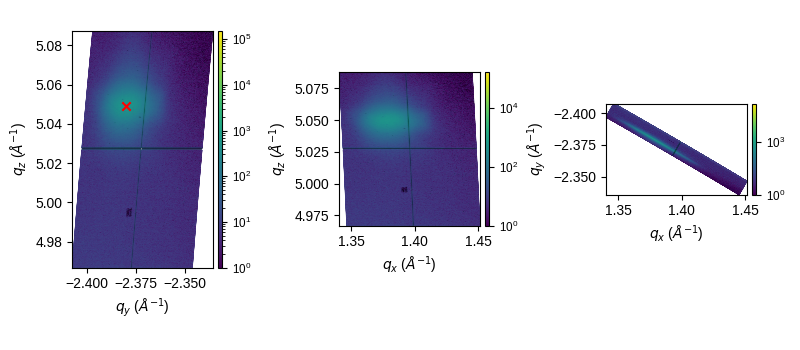

In [19]:
fig, ax = plt.subplots(1,3,figsize=(8,3.5), dpi=100)

ax[0].pcolormesh(qy, qz, fint, norm=LogNorm(), shading='gouraud')
ax[1].pcolormesh(qx, qz, fint, norm=LogNorm(), shading='gouraud')
ax[2].pcolormesh(qx, qy, fint, norm=LogNorm(), shading='gouraud')

ax[2].invert_yaxis()

[ax[i].set_ylabel(r'$q_z$ ($\AA^{-1}$)') for i in (0,1)]
[ax[i].set_xlabel(r'$q_x$ ($\AA^{-1}$)') for i in (1,2)]

ax[0].set_xlabel(r'$q_y$ ($\AA^{-1}$)')
ax[2].set_ylabel(r'$q_y$ ($\AA^{-1}$)')

ax[0].scatter(com_exp[1], com_exp[2], marker='x', c='r')

for a in ax:
    a.set_aspect('equal')
    sxdm.plot.add_colorbar(a, a.get_children()[0])
    
fig.tight_layout()

In [20]:
%%time

fint_tot = np.zeros((516,516))
for scan_no in scan_nos_25:
    fint_tot += sxdm.io.bliss.get_sxdm_frame_sum(path_dset_25, scan_no)
    print(f'\r{scan_no}/{scan_nos_25[-1]}', flush=True, end=' ')

18.1/18.1 CPU times: user 2.91 s, sys: 11.7 s, total: 14.6 s
Wall time: 27 s


Text(0.5, 1.0, 'Masked')

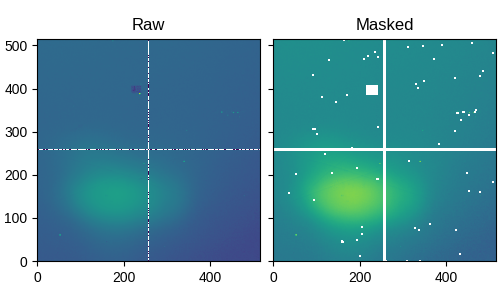

In [21]:
# sum of all frames for all scans (computed elsewhere)
_roi = np.s_[:,:]

# mask
fmask = np.zeros_like(fint_tot)
fmask[_roi][fint_tot[_roi] == 0] = 1
fmask[_roi][fint_tot[_roi] > 1e7] = 1
fmask[387:406,217:241] = 1

# plot
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, layout='constrained', figsize=(5,3))

ax[0].imshow(fint_tot, norm=LogNorm())
ax[1].imshow(np.ma.masked_array(fint_tot, mask=fmask), norm=LogNorm())

ax[0].set_title('Raw')
ax[1].set_title('Masked')

# ax[0].set_xlim(240,270)
# ax[0].set_ylim(240,270)

In [22]:
maxbins = sxdm.process.xsocs.estimate_n_bins(path_master, offsets=offsets)
print(f'Max n of bins: {maxbins}')

Subtracting 0.111 from eta

Subtracting -0.000 from phi




Subtracting 0.213 from delta

Max n of bins: [130, 60, 131]


In [23]:
path_qspace = f'{path_out}/qspace_shift_0.h5'

In [24]:
%%time

try:
    sxdm.process.xsocs.grid_qspace_xsocs(
        path_qspace,
        path_master_shifted, 
        [100,55,100],
        overwrite=True,
        offsets=offsets,
        mask=fmask,
    )
except RuntimeError:
    print('> Data exists! Set overwrite=True if needed.\n')

Subtracting 0.111 from eta

Subtracting -0.000 from phi




Subtracting 0.213 from delta

Process 4 started.Process 6 started.Process 9 started.Process 11 started.Process 12 started.Process 5 started.Process 7 started.Process 2 started.Process 1 started.Process 13 started.Process 10 started.Process 3 started.Process 8 started.Process 16 started.Process 17 started.Process 14 started.Process 0 started.
Process 19 started.Process 20 started.
Process 21 started.Process 18 started.

Process 15 started.



Process 23 started.

Process 24 started.





Process 26 started.





Process 32 started.
Process 30 started.
Process 28 started.Process 29 started.Process 33 started.Process 25 started.Process 34 started.

Process 35 started.Process 27 started.
Process 38 started.


Process 31 started.Process 37 started.Process 36 started.







Process 39 started.
Process 22 started.
#0/25600
#100/25600
#200/25600
#300/25600
#400/25600
#500/25600
#600/25600
#700/25600
#800/25600
#900/25600
#1000/25600


# Determination of a VOI in reciprocal space

In [27]:
qx, qy, qz = sxdm.utils.get_qspace_coords(path_qspace)

if False:
    qspace_avg = sxdm.io.xsocs.get_qspace_avg(path_qspace, n_threads=55)
    np.save(f'{path_out}/qspace_avg.npy', qspace_avg)
    
qspace_avg = np.load(f'{path_out}/qspace_avg.npy')

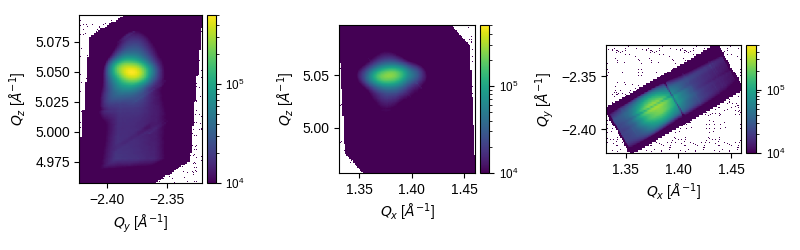

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2.5), layout='tight')

_qext = sxdm.utils.get_q_extents(qx, qy, qz)
for i in range(3):
    ax[i].imshow(qspace_avg.sum(i).T, extent=_qext[i],
                 origin='lower', aspect='equal', norm=LogNorm(1e4,5e5))
    cbar = sxdm.plot.add_colorbar(ax[i], ax[i].get_images()[0], size='7%')

# labels etc.
ax[0].set_xlabel(r'$Q_y$ [$\AA^{-1}$]')
ax[2].set_ylabel(r'$Q_y$ [$\AA^{-1}$]')

for i in (1, 2):
    ax[i].set_xlabel(r'$Q_x$ [$\AA^{-1}$]')

for i in (0, 1):
    ax[i].set_ylabel(r'$Q_z$ [$\AA^{-1}$]')

IntSlider(value=66, description='depth', max=99)

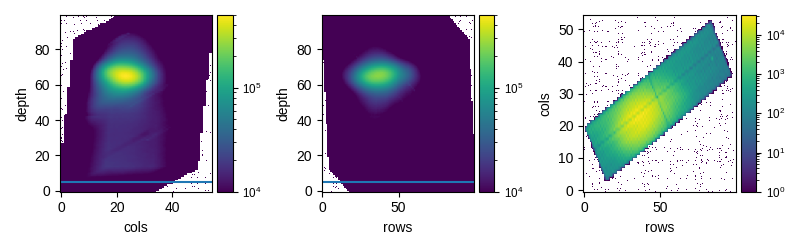

In [33]:
i0 = 66

fig, ax = plt.subplots(1, 3, figsize=(8, 2.5), layout='tight')

im0 = ax[0].imshow(qspace_avg.sum(0).T, norm=LogNorm(1e4,5e5), aspect='auto')
lines0 = [ax[i].axhline(qz[i0]) for i in (0, 1)]
ax[0].set_xlabel(r'cols')
ax[0].set_ylabel(r'depth')

im1 = ax[1].imshow(qspace_avg.sum(1).T, norm=LogNorm(1e4,5e5), aspect='auto')
ax[1].set_xlabel(r'rows')
ax[1].set_ylabel(r'depth')

imslice = ax[2].imshow(qspace_avg[..., i0].T, norm=LogNorm(), aspect='auto')
ax[2].set_xlabel(r'rows')
ax[2].set_ylabel(r'cols')

for a in ax:
    cbar = sxdm.plot.add_colorbar(a, a.get_images()[0], size='10%')

fig.subplots_adjust(bottom=.22, top=.9, left=.08, right=.98)
    
def sliceit(change):
    i0 = change['new']
    _0 = [l.set_ydata(i0) for l in lines0]
    imslice.set_data(qspace_avg[..., i0].T)

    ax[2].set_title(f'depth: {i0}')
    fig.canvas.draw()

slider = ipw.IntSlider(value=i0, min=0, max=qspace_avg.shape[-1]-1, description='depth')
slider.observe(sliceit, names='value')
slider

In [34]:
mask = np.zeros(qspace_avg.shape).astype('bool')
mask[8:70, 8:40, 40:86] = True # rows, cols, depth
mask = ~mask

In [35]:
roi         = np.where(~mask) # list of VOI indexes
roi_sh      = tuple([x.max()-x.min()+1 for x in roi]) # shape of the VOI
roi_idxs    = [(x.min(), x.max()+1) for x in roi] # VOI in pixel coords
roi_slice   = tuple([slice(x.min(), x.max()+1) for x in roi]) # VOI as slices to preserve shape
roi_qcoords = [q[roi_slice] for q in np.meshgrid(qx, qy, qz, indexing='ij')] # VOI in q-coordinates

qspace_avg_masked = np.ma.masked_array(data=qspace_avg, mask=mask) # VOI via a masked array: original shape
qspace_avg_sliced = qspace_avg[roi_slice] # VOI via slicing: new shape

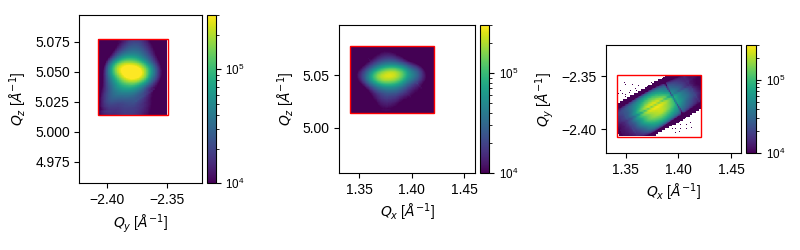

In [36]:
%matplotlib widget

from matplotlib.patches import Rectangle as R

fig, ax = plt.subplots(1, 3, figsize=(8, 2.5), layout='tight')

# draw the _roi as rectangles
_roi = [y for x in roi_qcoords for y in [x.min(), x.max()]]
r2 = R((_roi[0], _roi[2]), _roi[1]-_roi[0], _roi[3]-_roi[2],
       edgecolor='r', facecolor='none', transform=ax[2].transData)  # xy
r1 = R((_roi[0], _roi[4]), _roi[1]-_roi[0], _roi[5]-_roi[4],
       edgecolor='r', facecolor='none', transform=ax[1].transData)  # xz
r0 = R((_roi[2], _roi[4]), _roi[3]-_roi[2], _roi[5]-_roi[4],
       edgecolor='r', facecolor='none', transform=ax[0].transData)  # yz

_qext = sxdm.utils.get_q_extents(qx, qy, qz)
for i, r in zip(range(3), [r0, r1, r2]):
    ax[i].imshow(qspace_avg_masked.sum(i).T, extent=_qext[i],
                 origin='lower', aspect='equal', norm=LogNorm(1e4,3e5))
    ax[i].add_patch(r)
    cbar = sxdm.plot.add_colorbar(ax[i], ax[i].get_images()[0], size='7%')

# labels etc.
ax[0].set_xlabel(r'$Q_y$ [$\AA^{-1}$]')
ax[2].set_ylabel(r'$Q_y$ [$\AA^{-1}$]')

for i in (1, 2):
    ax[i].set_xlabel(r'$Q_x$ [$\AA^{-1}$]')

for i in (0, 1):
    ax[i].set_ylabel(r'$Q_z$ [$\AA^{-1}$]')

# Calculation and visualisation of local structural parameters

## COMs 

In [37]:
%time cx_t, cy_t, cz_t = sxdm.process.math.calc_coms_qspace3d(path_qspace, mask, n_pix=500)

CPU times: user 9.92 s, sys: 9.62 s, total: 19.5 s
Wall time: 20.5 s


In [38]:
%time roi_int_t = sxdm.process.math.calc_roi_sum(path_qspace, mask)

CPU times: user 38.9 ms, sys: 652 ms, total: 691 ms
Wall time: 4.07 s


In [39]:
# load piezo coordinates
pix, piy = sxdm.io.xsocs.get_piezo_motorpos(path_master_shifted)

# (x, y) shift window and extents
row_min, row_max = [m if m != 0 else None for m in (int(shifts[:,0].max()), int(shifts[:,0].min()))]
col_min, col_max = [m if m != 0 else None for m in (int(shifts[:,1].max()), int(shifts[:,1].min()))]

pi_win = np.s_[row_min:row_max, col_min:col_max] 
pi_ext = [pix.min(), pix.max(), piy.min(), piy.max()]

# mask based on (x, y) shift window
dmask = np.ones_like(pix)
dmask[pi_win] = 0

# make masked arrays
cx, cy, cz, roi_int = [np.ma.masked_where(
    dmask != 0, x.reshape(pix.shape)) for x in (cx_t, cy_t, cz_t, roi_int_t)]

Returning pix,piy of shape [160, 160]


In [40]:
# reference q vector
cxm, cym, czm = cx.mean(), cy.mean(), cz.mean()

# local q vector and its magnitude
Q = np.array([cx, cy, cz])
q = np.sqrt(cx**2 + cy**2 + cz**2)

# average q vector and its magnitude
Q_av = np.array([cxm, cym, czm])
q_av = np.sqrt(cxm**2 + cym**2 + czm**2)

# local and average interplanar distances
d = 2 * np.pi / q
d_av = 2 * np.pi / q_av

# abosulte angle between q and Q : tilt magnitude
_numerator = np.dot(
    Q_av, Q.flatten().reshape(3, Q.shape[1]*Q.shape[2])
)
_denominator = q.flatten() * q_av
tiltmag = np.degrees(np.arccos(_numerator / _denominator))
tiltmag = tiltmag.reshape(q.shape)

# azimuthal angle between q and Q : tilt direction
az = 90 + np.degrees(np.arctan2(cx - cxm, cy - cym))

# compute tilt magnitude + direction in single HSV array
tilt = sxdm.plot.make_hsv(tiltmag, az, stretch=True)

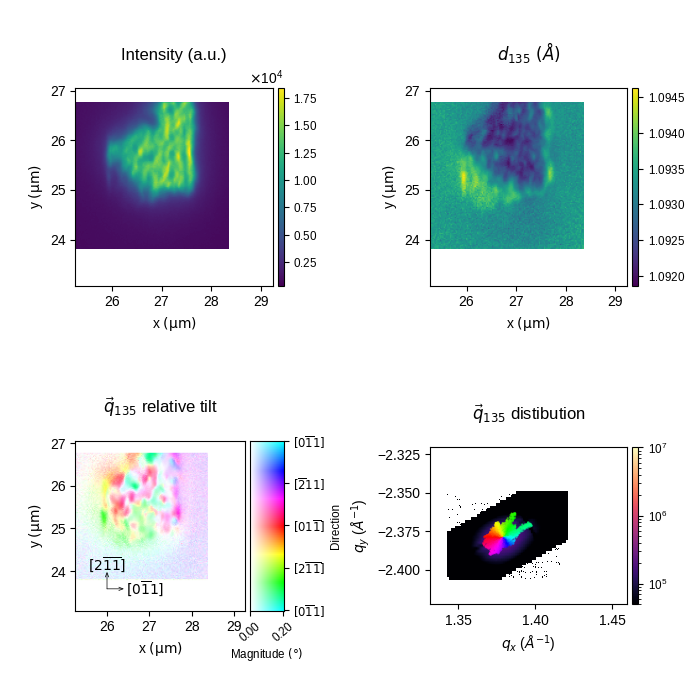

In [41]:
# rotate the result arrays to match the q-space directions
roi_int_plot, d_plot, tilt_plot = [
    np.fliplr(np.rot90(m, k=3)) for m in (roi_int, d, tilt)
]

# figure init
titles = [
    r"Intensity (a.u.)", 
    r"$d_{135}~(\AA)$", 
    r"$\vec{q}_{135}$ relative tilt", 
    r"$\vec{q}_{135}$ distibution"
]
fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 7),
    layout="tight",
    dpi=100,
)
ax = axs.flatten()

# plots
ax[0].imshow(roi_int_plot, extent=pi_ext, cmap="viridis")
ax[1].imshow(d_plot, extent=pi_ext, cmap="viridis")
ax[2].imshow(tilt_plot, extent=pi_ext, cmap="hsv")

_az = np.degrees(np.arctan2(cy - cym, cx - cxm))
qext = [qx.min(), qx.max(), qy.min(), qy.max()]

ax[3].imshow(
    qspace_avg_masked.sum(2).T,
    extent=qext,
    norm=LogNorm(5e4, 1e7),
    cmap="magma",
    origin="lower",
)
ax[3].scatter(
    cx, cy, marker="o", s=0.5, c=-_az, cmap="hsv", alpha=0.5, vmin=-180, vmax=180
)

# normal colorbars
for a, t in zip(ax, titles):
    a.set_title(t, pad=20)
    if a != ax[2]:
        cbar = sxdm.plot.add_colorbar(a, a.get_images()[0])
        try:
            cbar.ax.ticklabel_format(scilimits=(0, 0), useMathText=True)
        except:
            pass

# tilt colorbar
labels = ["$[0\overline{1}1]$", "$[2\overline{1}\overline{1}]$", "$[01\overline{1}]$"]
labels += ["$[\overline{2}11]$", "$[0\overline{1}1]$"]
sxdm.plot.add_hsv_colorbar(tiltmag, ax[2], labels)

# labels
_ = [a.set_xlabel("x $(\mathsf{\mu m})$") for a in ax[:3]]
_ = [a.set_ylabel("y $(\mathsf{\mu m})$") for a in ax[:3]]

ax[3].set_ylabel(r"$q_y$ ($\AA^{-1}$)")
ax[3].set_xlabel(r"$q_x$ ($\AA^{-1}$)")

# more labels
_ = sxdm.plot.add_directions(ax[2], r'$[0\overline{1}1]$', r'$[2\overline{1}\overline{1}]$', 'lower left')

In [77]:
# fig

In [42]:
%matplotlib widget

results = {'interplanar_distance': d, 'roi_intensity': roi_int,
           'tilt': tilt, 'tilt_magnitude': tiltmag, 'tilt_azimuth': az}

viz = sxdm.widgets.xsocs.Inspect5DQspace(
    results,
    path_qspace,
    relim_int=True,
    init_idx=[50, 50],
    projections='2d',
    coms=[cx,cy,cz],
#     qspace_roi=roi_slice,
)

viz.ax[0, 0].get_images()[0].set_cmap("viridis")
viz.fig.set_figwidth(11)
viz.fig.set_figheight(8.5)
viz._iflog.value = True
viz.show()

## Gaussian fitting (via XSOCS) 

Compute the sum of the intensity falling within the VOI at all sample positions if not done already above:

In [43]:
# %time roi_int_t = sxdm.process.math.calc_roi_sum(path_qspace, mask)

In [44]:
# load piezo coordinates
pix, piy = sxdm.io.xsocs.get_piezo_motorpos(path_master_shifted)

# (x, y) shift window and extents
row_min, row_max = [m if m != 0 else None for m in (int(shifts[:,0].max()), int(shifts[:,0].min()))]
col_min, col_max = [m if m != 0 else None for m in (int(shifts[:,1].max()), int(shifts[:,1].min()))]

pi_win = np.s_[row_min:row_max, col_min:col_max] 
pi_ext = [pix.min(), pix.max(), piy.min(), piy.max()]

# mask based on (x, y) shift window
dmask = np.ones_like(pix)
dmask[pi_win] = 0

# mask array
roi_int = np.ma.masked_where(dmask != 0, roi_int_t.reshape(pix.shape))

Returning pix,piy of shape [160, 160]


Prepare the Gaussian fitting:

In [45]:
from xsocs.process.fit import PeakFitter, FitTypes, BackgroundTypes
from xsocs.io.FitH5 import FitH5

fitter = PeakFitter(
    path_qspace,
    fit_type=FitTypes.GAUSSIAN,
    n_proc=os.cpu_count(),
    roi_indices=roi_idxs,
    background=BackgroundTypes.SNIP,
)

Run the fitting and load the results:

In [46]:
%%time 
    
# Run the processing and get the results
results = fitter.peak_fit()

# Check for errors
if fitter.status != fitter.DONE:
    print("Fit process failed")
    sys.exit()

headers = ['sample_x', 'sample_y']
values = [results.sample_x, results.sample_y]

for dimension, axis_name in enumerate(results.qspace_dimension_names): # qx, qy, qz
    for parameter_name in results.available_result_names: # Area, Center, Sigma, Status
        headers.append(axis_name + '_' + parameter_name)
        values.append(results.get_results(dimension, parameter_name))

# transpose values from (parameters x points) to (points x parameters)
values = np.array(values).T

# load piezo coordinates
pix, piy = sxdm.io.xsocs.get_piezo_motorpos(path_master_shifted)

# make dict of results
res = {headers[i]:values[...,i].reshape(pix.shape) for i in range(len(headers))}

# reduce dict to only relevant data
names = [[f'q{m}_Area', f'q{m}_Center', f'q{m}_Sigma'] for m in 'x,y,z'.split(',')]
fits_gauss = {n[0].split('_')[0]:np.vstack([res[m].flatten() for m in n]).T for n in names}

# get the local q vector coordinates fromt the fits
gx, gy, gz = [np.vstack(f)[..., 1].reshape(pix.shape) for f in fits_gauss.values()]
gx, gy, gz = [np.ma.masked_where(dmask.reshape(pix.shape) != 0, g) for g in (gx, gy, gz)] 

Returning pix,piy of shape [160, 160]
CPU times: user 2.67 s, sys: 1.67 s, total: 4.35 s
Wall time: 6.49 s


Compute local structural parameters:

In [47]:
# reference q vector
gxm, gym, gzm = gx.mean(), gy.mean(), gz.mean()

# local q vector and its magnitude
Q = np.array([gx, gy, gz])
q = np.sqrt(gx**2 + gy**2 + gz**2)

# average q vector and its magnitude
Q_av = np.array([gxm, gym, gzm])
q_av = np.sqrt(gxm**2 + gym**2 + gzm**2)

# local and average interplanar distances
d = 2 * np.pi / q
d_av = 2 * np.pi / q_av

# abosulte angle between q and Q : tilt magnitude
_numerator = np.dot(
    Q_av, Q.flatten().reshape(3, Q.shape[1]*Q.shape[2])
)
_denominator = q.flatten() * q_av
tiltmag = np.degrees(np.arccos(_numerator / _denominator))
tiltmag = tiltmag.reshape(q.shape)

# azimuthal angle between q and Q : tilt direction
az = 90 + np.degrees(np.arctan2(gx - gxm, gy - gym))

# compute tilt magnitude + direction in single HSV array
tilt = sxdm.plot.make_hsv(tiltmag, az, stretch=True)

Plot:

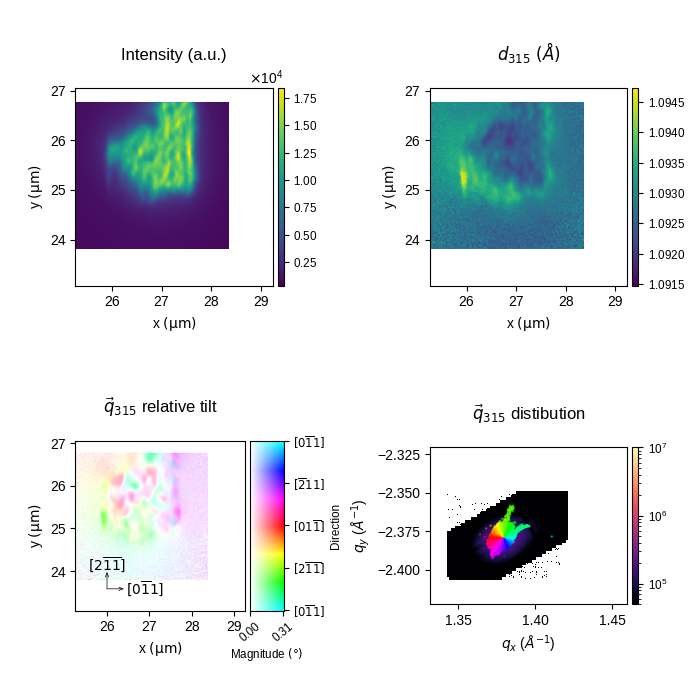

In [48]:
# rotate the result arrays to match the q-space directions
roi_int_plot, d_plot, tilt_plot = [
    np.fliplr(np.rot90(m, k=3)) for m in (roi_int, d, tilt)
]

# figure init
titles = [
    r"Intensity (a.u.)", 
    r"$d_{315}~(\AA)$", 
    r"$\vec{q}_{315}$ relative tilt", 
    r"$\vec{q}_{315}$ distibution"
]
fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 7),
    layout="tight",
    dpi=100,
)
ax = axs.flatten()

# plots
ax[0].imshow(roi_int_plot, extent=pi_ext, cmap="viridis")
ax[1].imshow(d_plot, extent=pi_ext, cmap="viridis")
ax[2].imshow(tilt_plot, extent=pi_ext, cmap="hsv")

_az = np.degrees(np.arctan2(gy - gym, gx - gxm))
qext = [qx.min(), qx.max(), qy.min(), qy.max()]

ax[3].imshow(
    qspace_avg_masked.sum(2).T,
    extent=qext,
    norm=LogNorm(5e4, 1e7),
    cmap="magma",
    origin="lower",
)
ax[3].scatter(
    gx, gy, marker="o", s=0.5, c=-_az, cmap="hsv", alpha=0.5, vmin=-180, vmax=180
)

# normal colorbars
for a, t in zip(ax, titles):
    a.set_title(t, pad=20)
    if a != ax[2]:
        cbar = sxdm.plot.add_colorbar(a, a.get_images()[0])
        try:
            cbar.ax.ticklabel_format(scilimits=(0, 0), useMathText=True)
        except:
            pass

# tilt colorbar
labels = ["$[0\overline{1}1]$", "$[2\overline{1}\overline{1}]$", "$[01\overline{1}]$"]
labels += ["$[\overline{2}11]$", "$[0\overline{1}1]$"]
sxdm.plot.add_hsv_colorbar(tiltmag, ax[2], labels)

# labels
_ = [a.set_xlabel("x $(\mathsf{\mu m})$") for a in ax[:3]]
_ = [a.set_ylabel("y $(\mathsf{\mu m})$") for a in ax[:3]]

ax[3].set_ylabel(r"$q_y$ ($\AA^{-1}$)")
ax[3].set_xlabel(r"$q_x$ ($\AA^{-1}$)")

# more labels
_ = sxdm.plot.add_directions(ax[2], r'$[0\overline{1}1]$', r'$[2\overline{1}\overline{1}]$', 'lower left')

In [70]:
# fig

In [49]:
%matplotlib widget

results = {'interplanar_distance': d, 'roi_intensity': roi_int,
           'tilt': tilt, 'tilt_magnitude': tiltmag, 'tilt_azimuth': az}

viz = sxdm.widgets.xsocs.Inspect5DQspace(
    results,
    path_qspace,
    init_idx=[100, 100],
    projections='1d',
    gauss_fits=fits_gauss,
#     qspace_roi=roi_slice,
    relim_int=True,
    xsocs_gauss=True,
)

viz.fig.set_figwidth(10)
viz.fig.set_figheight(8.5)
viz.show()

# Export data

In [ ]:
# !rm res_104.h5

In [ ]:
# with h5py.File('res_104.h5', 'a') as h5f:
    
#     # COM goup
#     if 'COM' not in h5f.keys():
#         coms = h5f.create_group('COM')
#     else:
#         coms = h5f['COM']
        
#     # com
#     for c, n in zip((cx, cy, cz), 'cx,cy,cz'.split(',')):
#         if n not in coms.keys():
#             coms.create_dataset(n, data=c)
#         else:
#             coms[n][...] = c
            
#     # Gauss goup
#     if 'Gauss' not in h5f.keys():
#         gauss = h5f.create_group('Gauss')
#     else:
#         gauss = h5f['Gauss']
        
#     # com
#     for n in fits_gauss.keys():
#         if f'g{n[1]}' not in gauss:
#             gauss.create_dataset(f'g{n[1]}', data=np.vstack(fits_gauss[n])) # area, pos, fwhm
#         else:
#             gauss[f'g{n[1]}'][...] = np.vstack(fits_gauss[n])

#     #  intensity
#     if 'roi_int' not in h5f.keys():
#         h5f.create_dataset('roi_int', data=roi_int)
#     else:
#         h5f['roi_int'][...] = roi_int
    
#     # window
#     if 'pi_win' not in h5f:
#         h5f.create_dataset('pi_win', data=str(pi_win))

In [ ]:
# h5p('res_104.h5')